## Problem Statement

One of the prestigious telecom company maintains a database of the customer and their details. Based on this dataset the requirememt is to create the classification model using Naive Bayes to predict if the customer will churn or not. There are around 7000+ records using this we need to create the model after breaking the data into test and train.

**Data Dictionary**

**CustomerID** - Unique Customer ID

**Gender** - Gender of the customer

**SeniorCitizen** - Whether a customer can be classified as a senior citizen

**Partner** - If a customer is married/ in a live-in relationship

**Dependents** - If a customer has dependents (children/ retired parents)

**Tenure** - The time for which a customer has been using the service

**PhoneService** - Whether a customer has a landline phone service along with the internet service

**MultipleLines** - Whether a customer has multiple lines of internet connectivity

**InternetService** - The type of internet services chosen by the customer

**OnlineSecurity** - Specifies if a customer has online security

**OnlineBackup** - Specifies if a customer has online backup

**DeviceProtection** -	Specifies if a customer has opted for device protection

**TechSupport** - Whether a customer has opted for tech support of not

**StreamingTV** - Whether a customer has an option of TV streaming

**StreamingMovies** - Whether a customer has an option of Movie streaming

**Contract** - The type of contract a customer has chosen

**PaperlessBilling** - Whether a customer has opted for paperless billing

**PaymentMethod** -	Specifies the method by which bills are paid

**MonthlyCharges** - Specifies the money paid by a customer each month

**TotalCharges** - The total money paid by the customer to the company

**Churn** -	This is the target variable which specifies if a customer has churned or not


# Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Understand the Data](#read)**
    - 2.2 - **[Exploratory Data Analysis](#eda)**
    - 2.3 - **[Missing Value Treatment](#null)**
    - 2.4 - **[Encoding](#enc)**
5. **[Splitting the data into Train and Test](#sd)**
6. **[Creating the model on training dataset](#model)**
7. **[Run the model on the Test Dataset](#test)**
8. **[Check the accuracy of the model](#acc)**
    - 6.1 - **[Accuracy Score](#accscore)**
    - 6.2 - **[Confusion Matrix](#cm)**

<a id="lib"></a>
# 1. Import Libraries

In [33]:
# Import the libraries which will be helpful for the data analysis. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

<a id="prep"></a>
# 2. Data Preparation

In [22]:
# Import the dataset which we will use for the modelling 
data=pd.read_csv(r"C:\Users\mukhe\OneDrive\Documents\KnowledgeHut\Capstones\Case Study - Naive Bayes\case_Study_nb.csv")
data.sample()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
6715,1173-XZPYF,11,Yes,Month-to-month,Yes,Electronic check,89.2,990.3,Female,0,...,No,Yes,Fiber optic,No,No,Yes,No,Yes,No,No


<a id="read"></a>
# 2.1. Understand the Data

In [5]:
# Display a brief summary on the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


In [6]:
# Display the total number of records present in the dataset
len(data)

7043

In [7]:
# Display the total number of the columns present in the dataset
data.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

In [9]:
# Display the names of the object type columns present in the dataset
data.select_dtypes('object').columns

Index(['customerID', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'gender', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

<a id="eda"></a>
# 2.2. Exploratory Data Analysis

**Create a Histogram to find which customers are more likely to churn: Customers with month to month subscription,Customers with one year subscription or Customers with 2 years subscription**

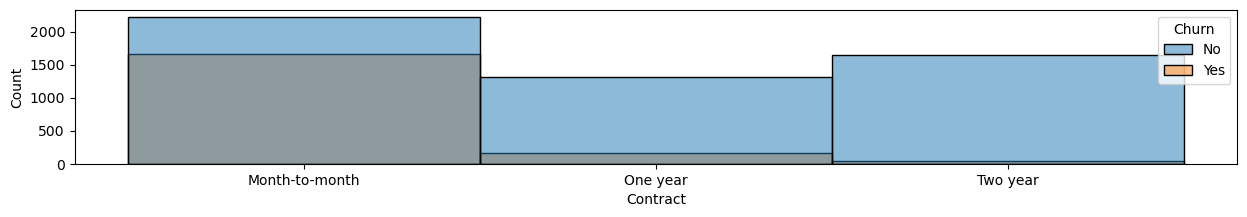

In [12]:
# Code here:
plt.figure(figsize=(15,2))
sns.histplot(x = 'Contract',hue='Churn',data=data)
plt.show()

**<span style='color:green'>From the above chart we can say that customers with month to month subscription are more likely to churn**

<a id="null"></a>
# 2.3. Missing Value Treatment

In [14]:
#Check the count of the missing values:

data.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Churn               0
dtype: int64

**There are no missing values in the dataset, hence we are not going to do the missing value imputation in the dataset**

<a id="enc"></a>
# 2.4. Encoding

In [25]:
# Convert the categorical data to discrete numerical data:
col=data.select_dtypes('object').columns
data[col]=data[col].astype('category')

for i in col:
    data[i]=data[i].cat.codes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int16  
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int8   
 3   Contract          7043 non-null   int8   
 4   PaperlessBilling  7043 non-null   int8   
 5   PaymentMethod     7043 non-null   int8   
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   gender            7043 non-null   int8   
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   int8   
 11  Dependents        7043 non-null   int8   
 12  MultipleLines     7043 non-null   int8   
 13  InternetService   7043 non-null   int8   
 14  OnlineSecurity    7043 non-null   int8   
 15  OnlineBackup      7043 non-null   int8   
 16  DeviceProtection  7043 non-null   int8   


<a id="sd"></a>
# 3. Splitting the data into Train and Test

In [28]:
# Split all the independent variables in one array
x = data.iloc[:,1:20].values

In [29]:
# Split the dependent variable in one array
y = data.iloc[:,-1].values

In [30]:
# Split the dataset into train and test based on the 70-30 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

<a id="model"></a>
# 4. Creating the model on training dataset

In [31]:
# Apply the naive bayes on the training dataset
GNBModel=GaussianNB().fit(x_train,y_train)

<a id="test"></a>
# 5. Run the model on the Test Dataset

In [32]:
# Run the model on the test dataset
y_pred=GNBModel.predict(x_test)

<a id="accscore"></a>
# 6.1. Accuracy Score

In [34]:
# Check the accuracy on the testing dataset
accuracy_score(y_test,y_pred)

0.7482252721249408

<a id="cm"></a>
# 6.2. Confusion Matrix

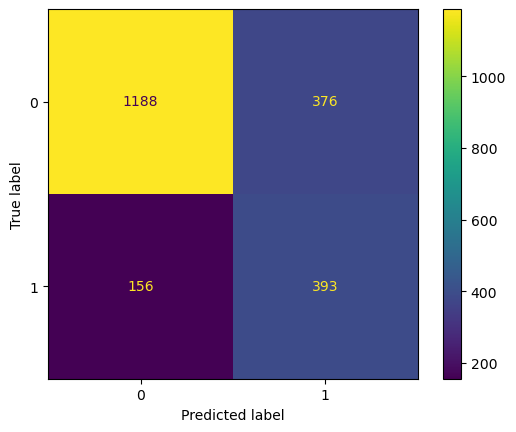

In [35]:
# Plot the confusion matrix plot to check the accuracy on the testing dataset
con_mat=confusion_matrix(y_test,y_pred)
con_display=ConfusionMatrixDisplay(con_mat)
con_display.plot()
plt.show()